In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov9-main
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/My Drive/yolov9-main
 benchmarks.py	  hubconf.py	     runs	       val_dual.py
 classify	  LICENSE.md	     scripts	       val.py
 data		  markerpens2.yaml   segment	       val_triple.py
 datasets	  markerpens.yaml    test	       yolov9-det.ipynb
 detect_dual.py   models	     tools	       yolov9-m-converted.pt
 detect.py	  panoptic	     train_dual.py    'yolov9 run.py'
 export.py	  __pycache__	     train.py	       yolov9-seg.ipynb
 figure		  README.md	     train_triple.py
 gelan-c-seg.pt   requirements.txt   utils


In [ ]:
%pip install -qr requirements.txt # install dependencies
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Setup complete. Using torch 2.6.0+cu124 (Tesla T4)


In [ ]:
%pip install Pillow==9.5.0

In [ ]:
!python train_dual.py --img 416 --batch 16 --epochs 100 --patience 0 --data markerpens2.yaml --cfg models/detect/yolov9-m.yaml --weights '' --name markerpens-det --hyp hyp.scratch-high.yaml --min-items 0 --close-mosaic 10 --cache

2025-05-29 19:44:37.415968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748547877.731567    2209 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748547877.814366    2209 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 19:44:38.486495: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: E

In [ ]:
!python val_dual.py --weights runs/train/markerpens-det/weights/best.pt --data markerpens2.yaml --img 416

val_dual: data=markerpens2.yaml, weights=['runs/train/markerpens-det/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 2025-5-14 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
yolov9-m summary: 588 layers, 32553166 parameters, 0 gradients, 130.7 GFLOPs
val: Scanning /content/gdrive/MyDrive/yolov9-main/datasets/markerpens2/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:03<00:00,  3.42s/it]
                   all         30         60      0.999      0.967      0.974      0.805
Speed: 0.1ms pre-process, 16.6ms inference, 11.8ms NMS per image at s

In [ ]:
!python detect_dual.py --weights runs/train/markerpens-det/weights/best.pt --data markerpens2.yaml --conf 0.5 --source test/images2

detect_dual: weights=['runs/train/markerpens-det/weights/best.pt'], source=test/images2, data=markerpens2.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 2025-5-14 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
yolov9-m summary: 588 layers, 32553166 parameters, 0 gradients, 130.7 GFLOPs
image 1/5 /content/gdrive/MyDrive/yolov9-main/test/images2/1B3246F6-8785-4465-AC56-3BE7AA44003D_jpeg.rf.42ad4544fea633e89b87fdf8b4bf9d0c.jpg: 640x480 2 CAPs, 86.9ms
image 2/5 /content/gdrive/MyDrive/yolov9-main/test/images2/22AFB41C-B380-452C-91D8-780D2108A518_jpeg.rf.e34122036dafe550a2beceb19988f33f.jpg: 640x480 2 CAPs, 71.5ms
image 3/5 /con

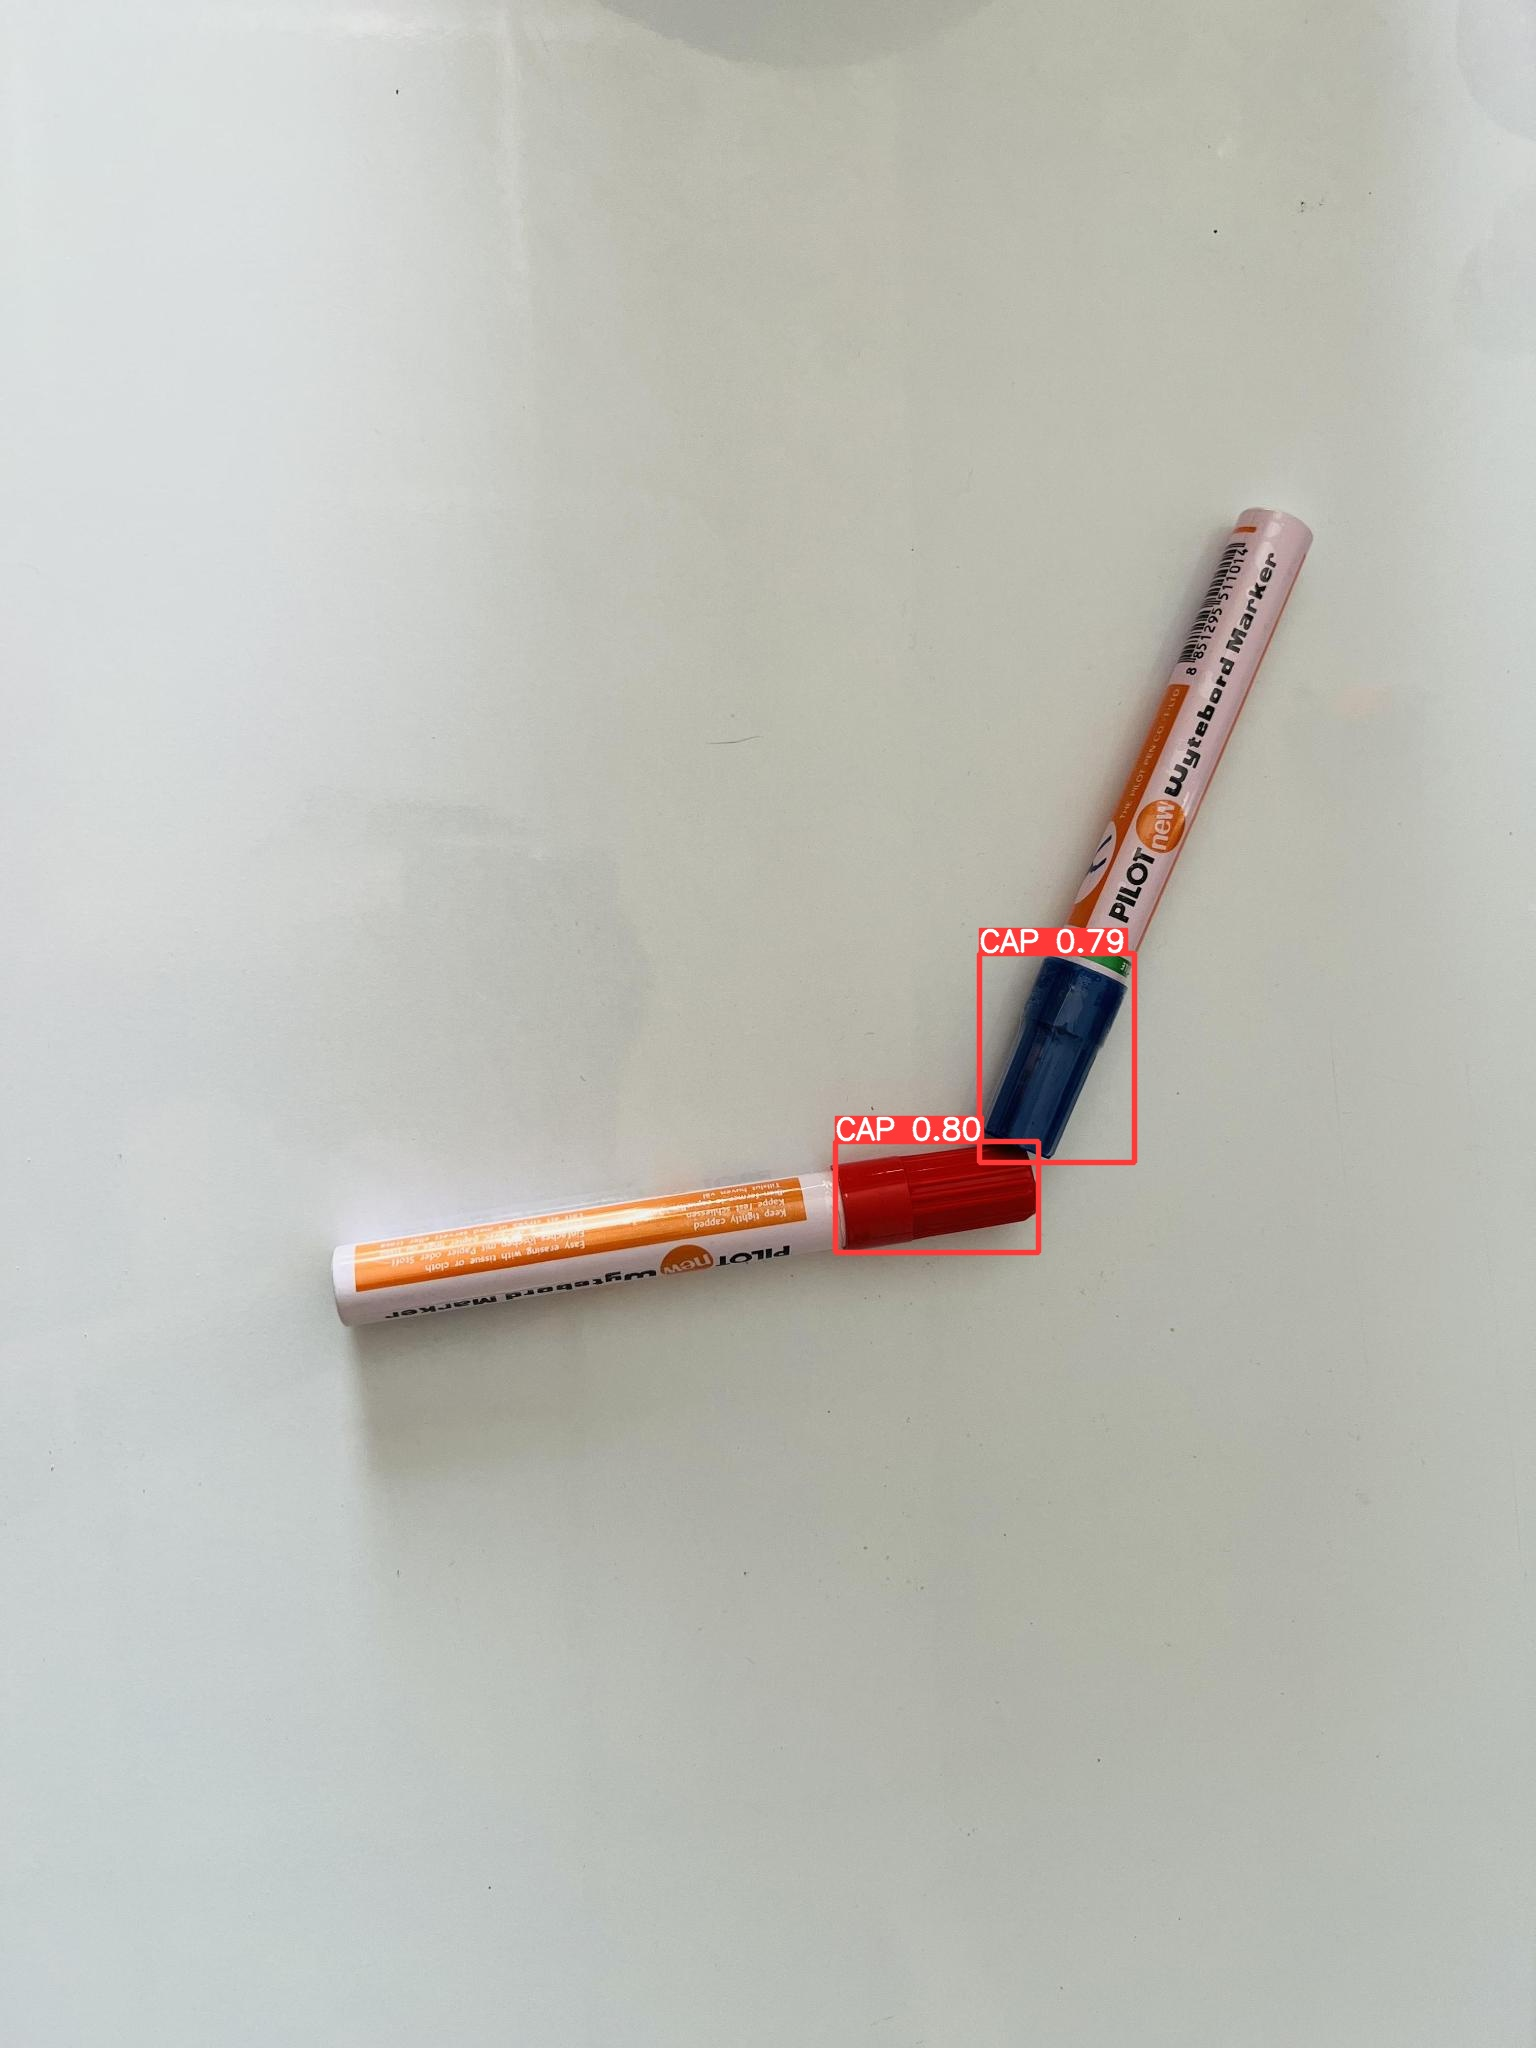

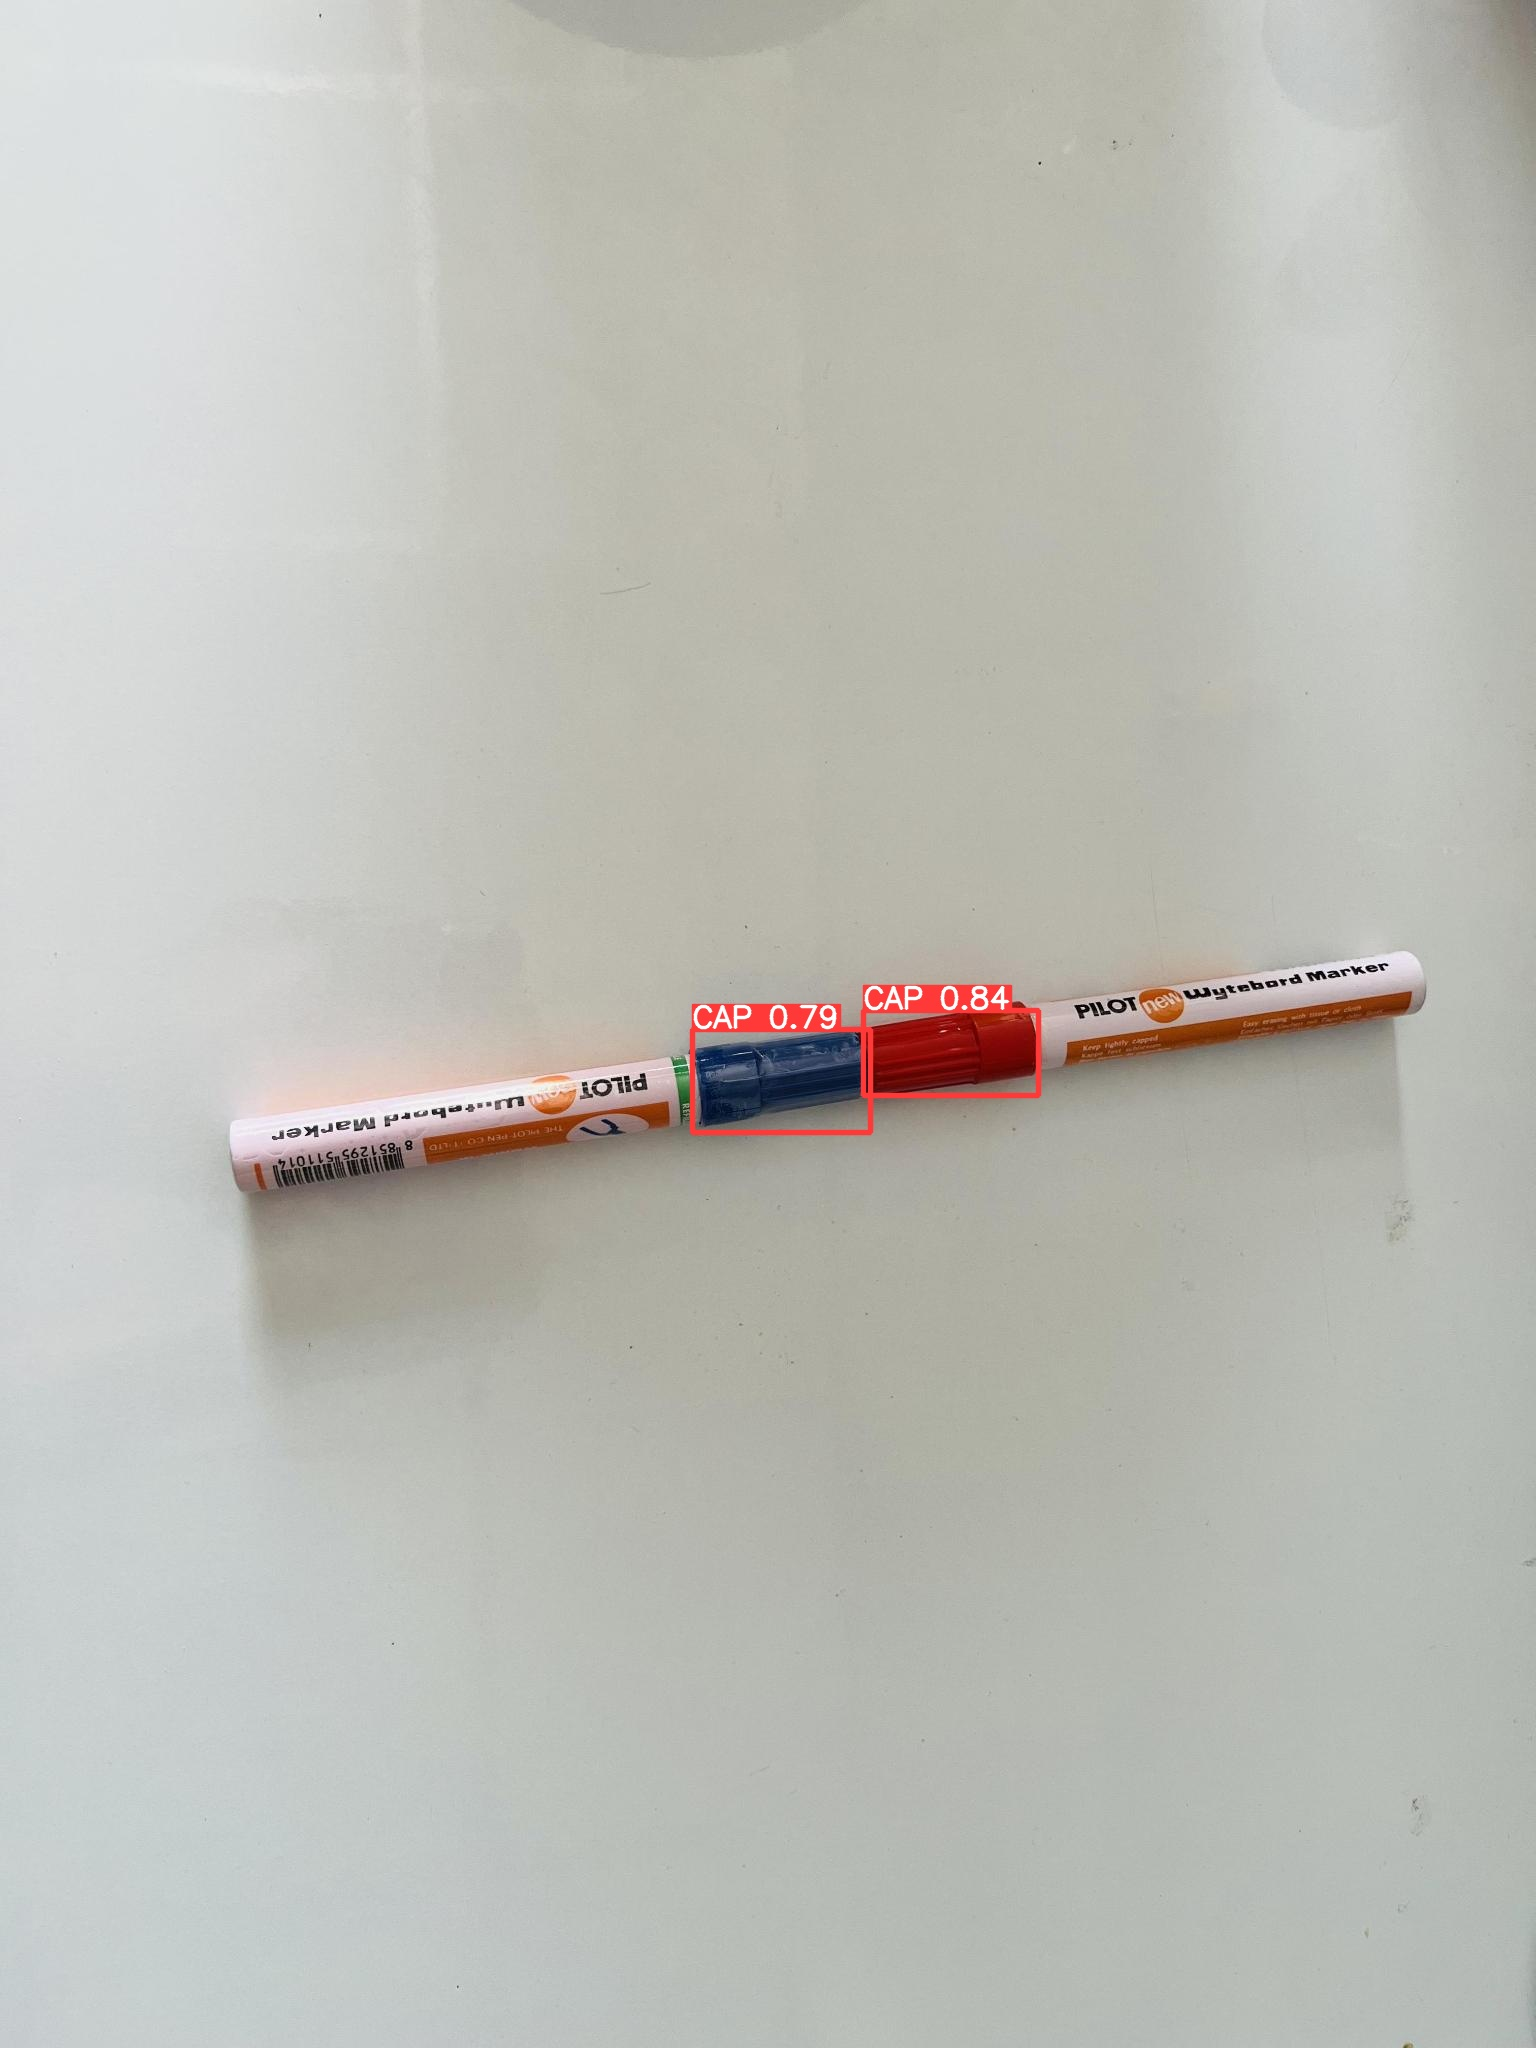

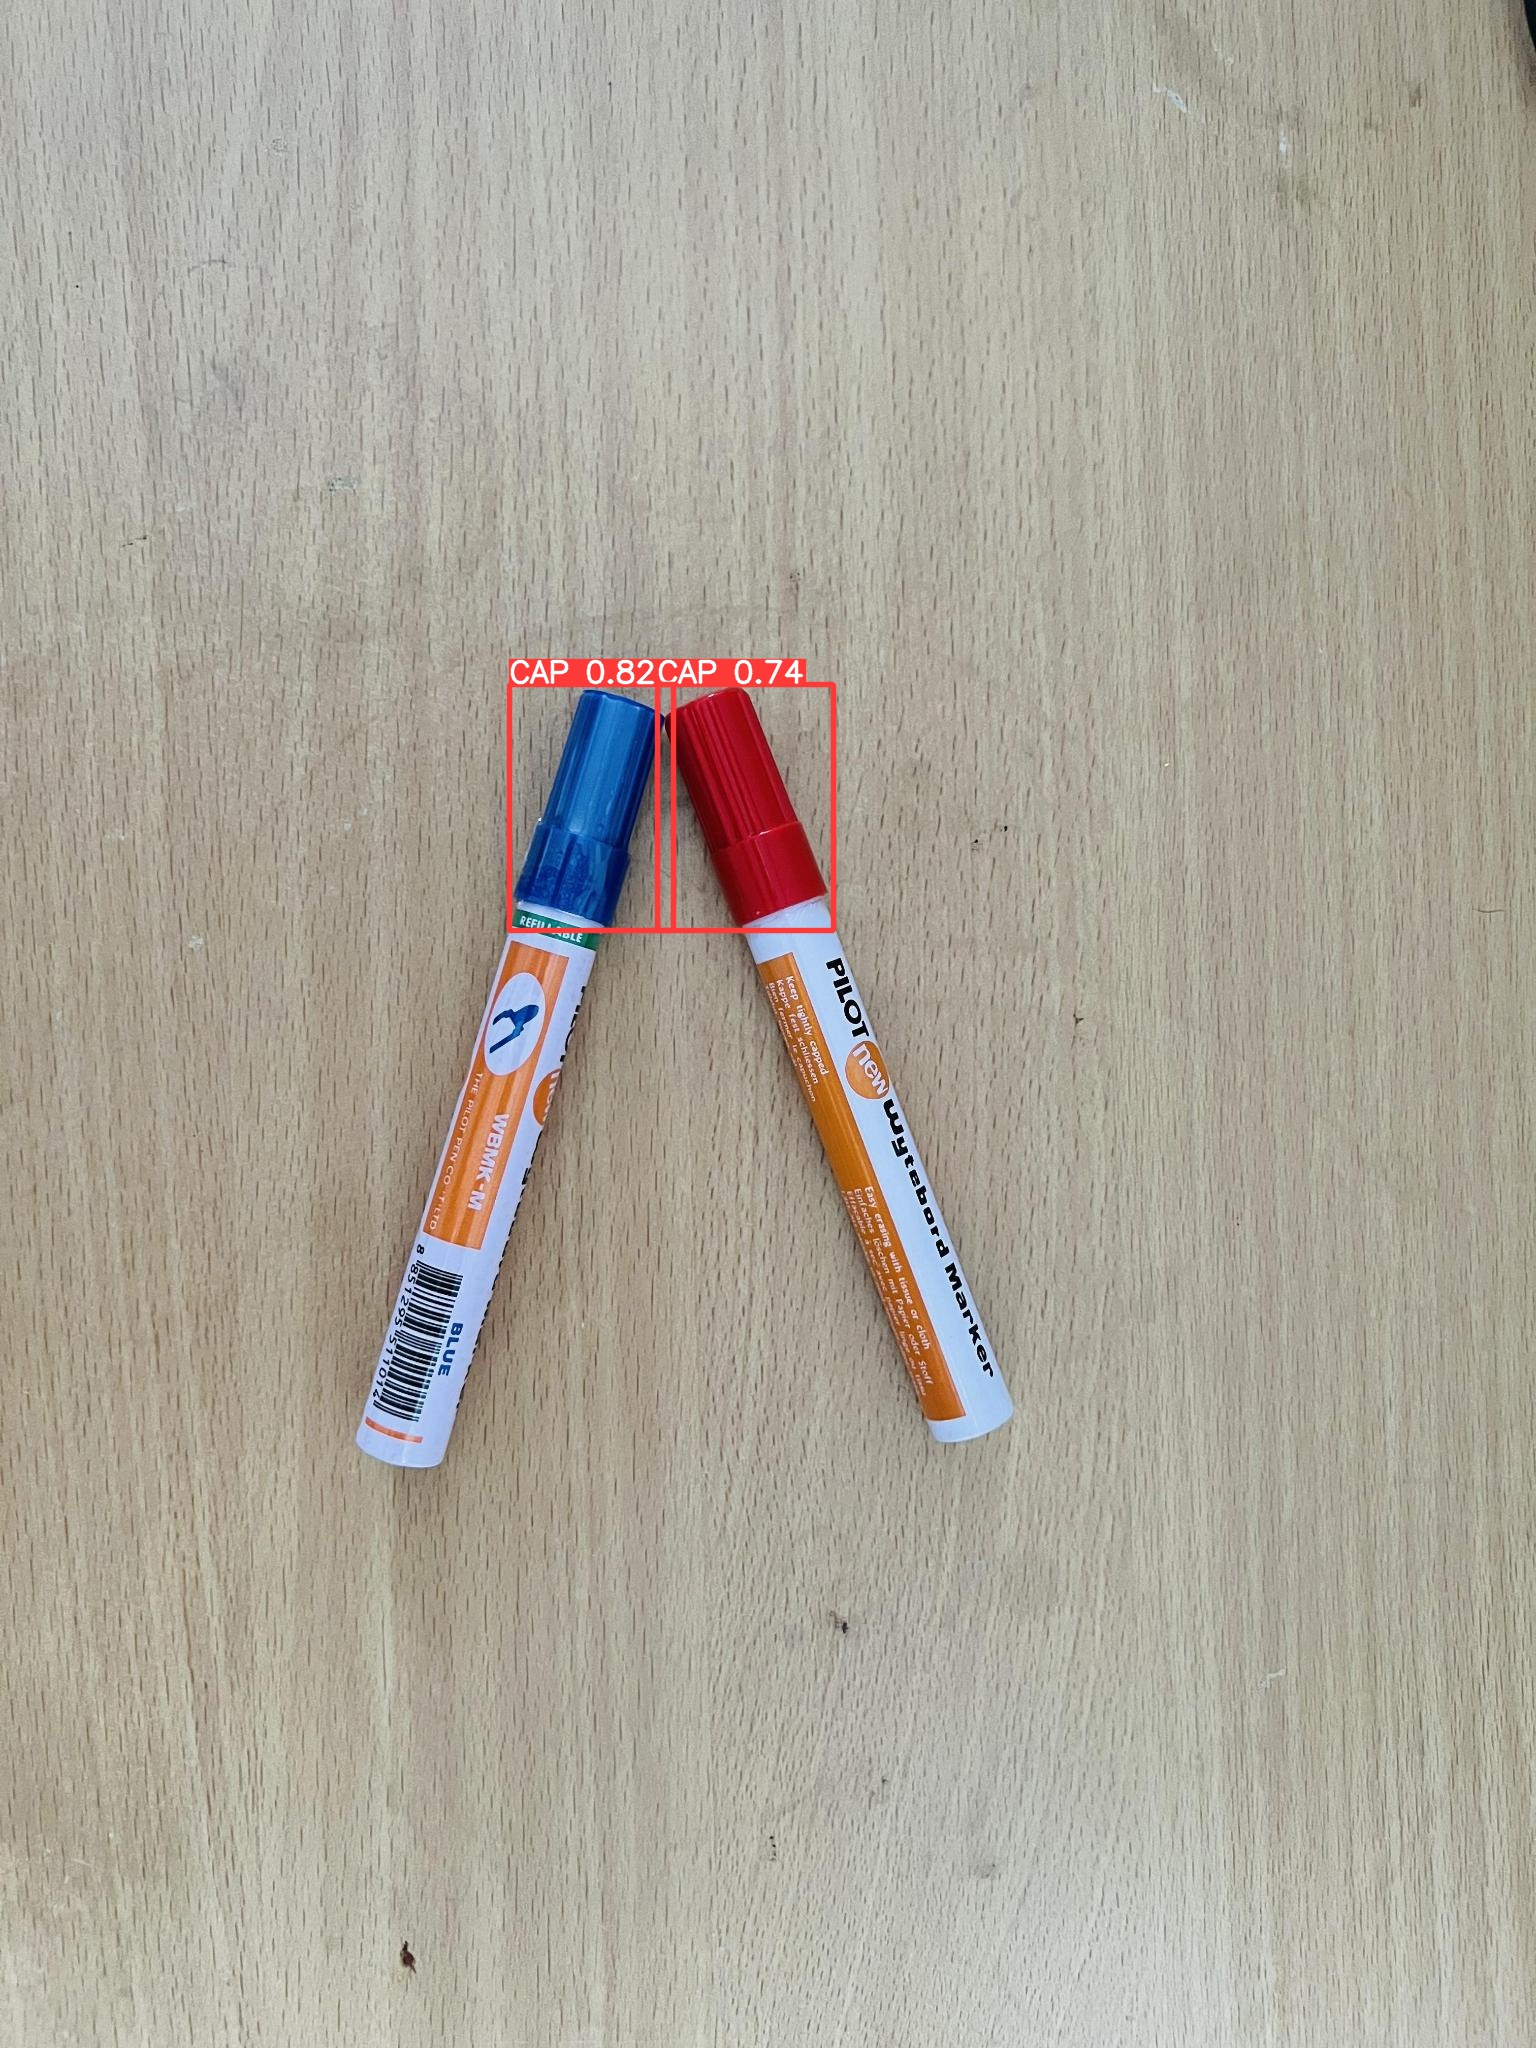

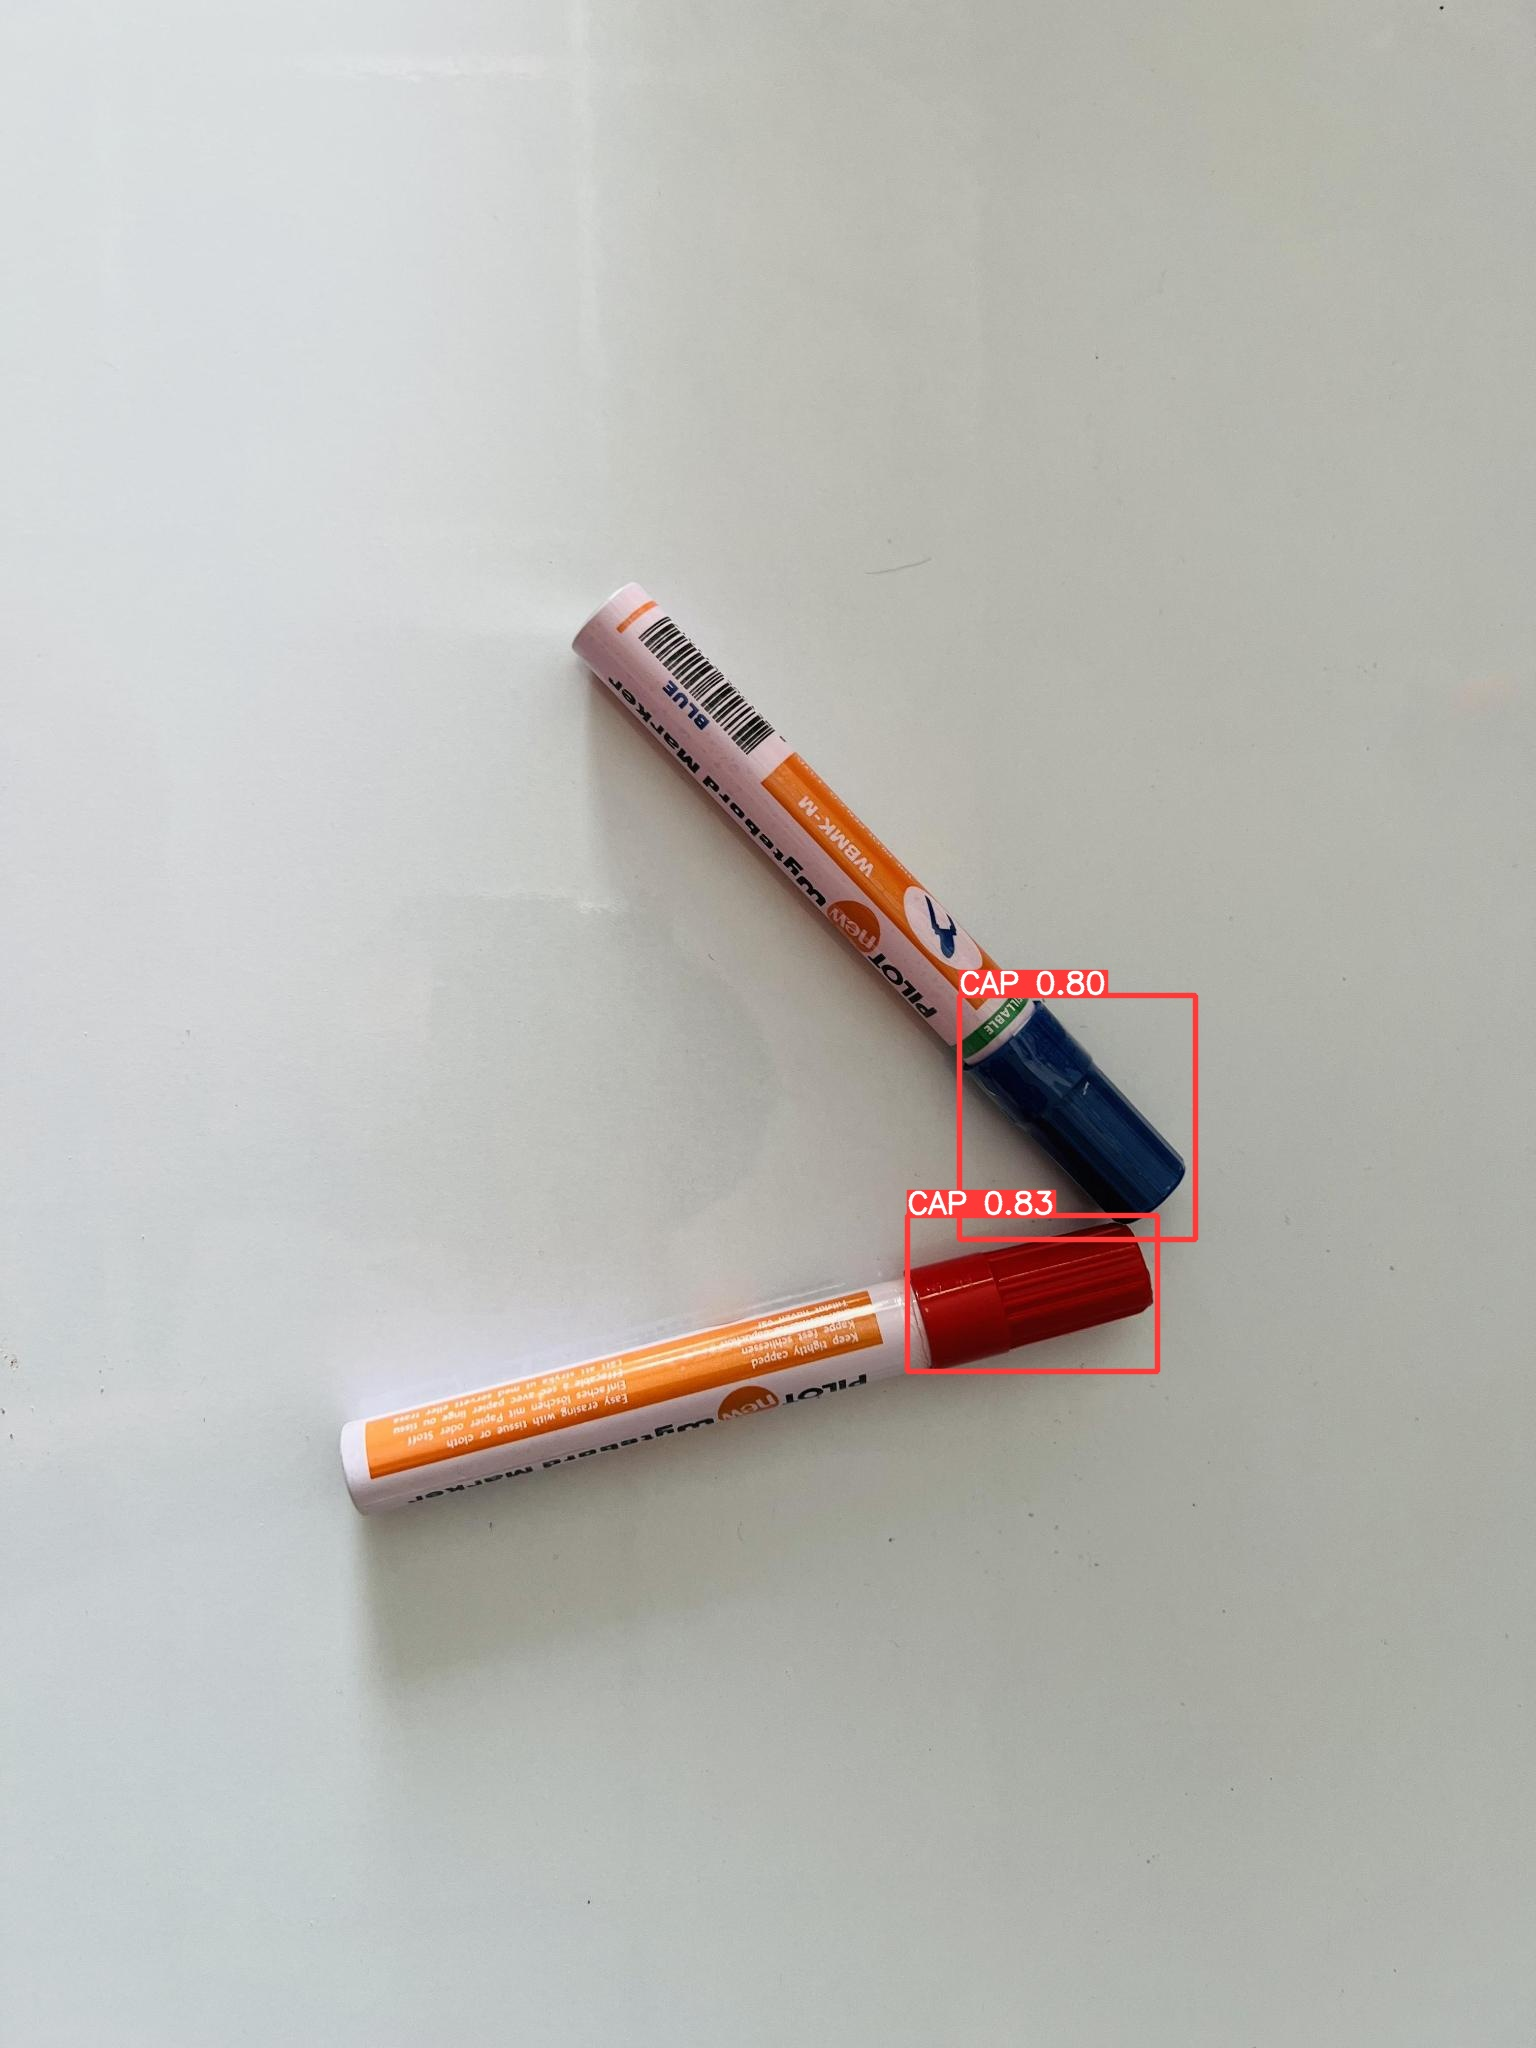

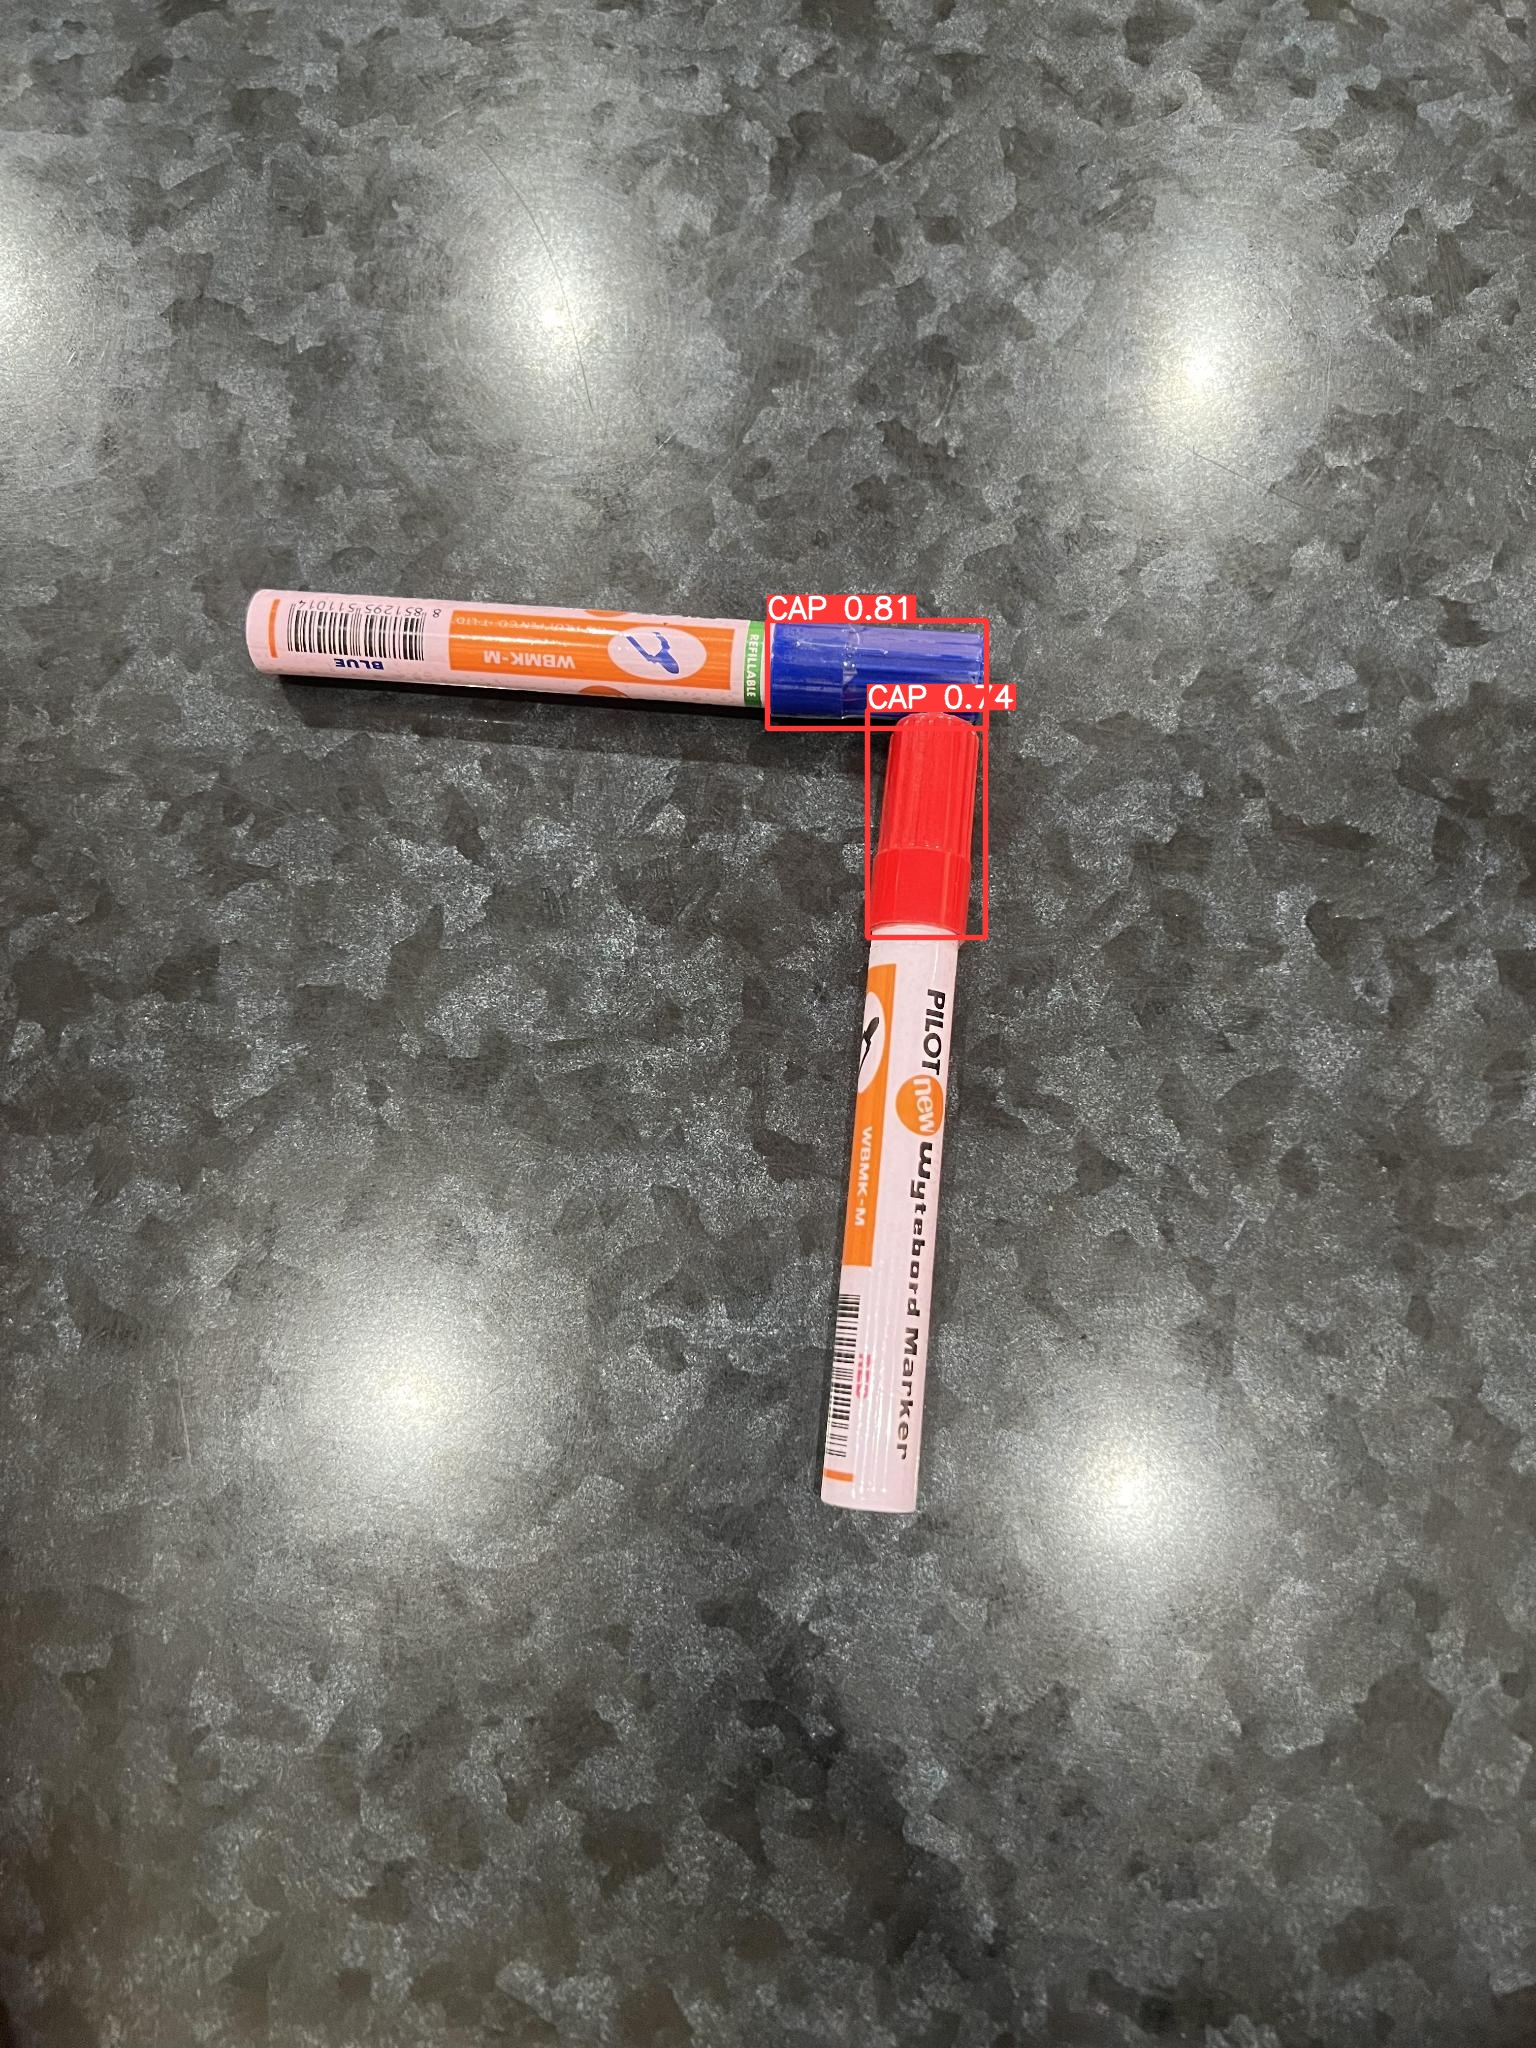

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName, height=600))
    print("\n")